# ___Fichiers, Dossiers et Visibilité___

---

Jusque-là, nous avons travaillé avec des programmes ou des libraires qui ne contenaient qu'un seul et unique fichier. Il est temps maintenant de remédier à cela et de créer des crates composées de plusieurs fichiers.

Pour faire simple, chaque ajout de fichier constituera du point de vue de notre crate un nouveau namespace ou espace de nom en français.

## Ajout de fichier

Dans le dossier src, en plus du fichier main.rs ou lib.rs, il sera possible de créer d'autres fichiers .rs. Chacun de ces fichiers constituera un nouveau namespace.

Ainsi, depuis le fichier main.rs le chemin sera `some_file_name::*;`. il est necessaire, afin que le fichier puisse être pris en compte, qu'il soit préalablement déclaré en tant que module au début du fichier main.rs ou lib.rs.  La directive est **mod some_file_name;** !

- Voici un exemple :

**tree src/**

```
src/
├── main.rs
└── operations.rs

0 directories, 2 files
```

**main.rs**

```
mod operations;

fn main() {}
```

Toute fonction, type, methode, trait etc. définis dans le fichier operations.rs devra être préfixé par le mot clef **pub** afin que l'on puisse s'en servir depuis d'autres modules dont le fichier main.rs. *En Rust, **une chose est publique ou ne l'est pas**, il n'y a pas l'équivalent du mot clef **protected** du c++.*

> Notons aussi que l'annotation publique via le mot clef pub n'est nécessaire que pour rendre publique quelque chose pour les parents, mais ne l'est pas pour les enfants. C'est-à-dire que si je définis une fonction dans le fichier operations.rs, elle devra être marquée pub afin que je puisse l'utiliser depuis main.rs. Au contraire, si je définis une fonction dans le fichier main.rs, il ne sera pas nécessaire de la rendre publique si je veux l'utiliser depuis operations.rs.

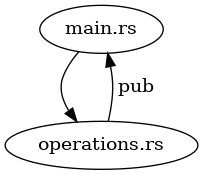

In [12]:
:dep petgraph = "*"
:dep petgraph-evcxr = "*"

extern crate petgraph;
use petgraph::graph::Graph;
use petgraph::dot::Dot;
use petgraph_evcxr::{draw_graph, draw_dot};

let mut g : Graph<&str, &str> = Graph::new();
let main = g.add_node("main.rs");
let operation = g.add_node("operations.rs");

g.add_edge(main, operation, "        ");
g.add_edge(operation, main, " pub");

draw_graph(&g);

## Les sous-dossiers

Il existe **deux** façons de créer des unités de compilation à dossier multiple, soit l'utilisation d'un fichier spécial nomme **mod.rs** qui fut la première approche lors du développement de rust, ou bien soit passer par la création d'**un fichier du même nom qu'un sous dossier** de notre projet.

### La technique legacy du fichier mod.rs

> Ici, l'idée est de **créer un sous-dossier** dans le projet et de créer un fichier **mod.rs** a l'intérieur de ce dernier qui pourra décrire différents sous-namespaces.

- Dans l'exemple ci-dessous, le sous-dossier se nomme **operations** et contient donc un fichier **mod.rs**.

**tree src/**

```
src/
├── main.rs
└── operations
    └── mod.rs

1 directory, 2 files
```

- On définit une fonction dummy dans le fichier **mod.rs**. Afin de pouvoir être utilisée depuis les namespaces parent, cette fonction devra être notée comme publique, grâce au mot-clef **pub** :

**mod.rs**

```
pub fn dummy() {
    println!("dummy fonction called!");
}
```

Si l'on build le projet à ce moment-là, rien ne se passera. Le sous-dossier opération sera complètement ignoré lors de la compilation. Cela vient du fait qu'il doit impérativement être qualifié en tant que module du côté du parent.

Ainsi, pour cet exemple, il sera nécessaire d'écrire `mod operations;` au début du fichier main.rs.

`operations` étant défini en tant que module, il constituera un nouveau namespace. Ainsi, afin de pouvoir utiliser la fonction dummy depuis le fichier main.rs, on utilisera soit `use operations::dummy;` et plus loin l'appel a `dymmy()` ou bien directement avec `operations::dummy()` depuis l'un des fonctions du programme.

```
mod operations;
use operations::dummy;

fn main() {
    dummy();
}
```

- De la même manière, de ce que nous avons vu tout à l'heure concernant le dossier src, il est tout à fait possible ici de rajouter d'autres fichiers dans le sous-dossier operations, ils constitueront chacun un nouveau namespace.

**tree src/**

```
src/
├── main.rs
└── operations
    ├── add.rs
    └── mod.rs

1 directory, 3 files
```

**ajout dans mod.rs**

```
pub mod add;
```

**chemin depuis main.rs**

```
operations::add::public_identifiant_name
```

**chemin depuis mod.rs**

```
add::public_identifiant_name
```

**NB : notez qu'il est possible de faire un re-export depuis mod.rs d'une fonction de add.rs, l'idée générale est d'écrire `pub use add::some_function;` dans le fichier mod.rs. Ainsi, depuis le fichier main.rs, il sera possible d'accéder à some_function avec le chemin `operations::some_function`.**

### Avec un fichier et un dossier du même nom

> Une autre approche s'est peu à peu imposée et est aujourd'hui préférée par nombre de développeurs à celle du fichier mod.rs. Plutôt que d'avoir un sous-dossier contenant un fichier mod.rs,  l'on créera un fichier .rs du même nom que le sous-dossier.

- Ainsi, pour reprendre l'exemple précédent, voici à quoi ressemblerait la nouvelle arborescence :

**tree src/**

```
src/
├── main.rs
├── operations
│   └── add.rs
└── operations.rs

1 directory, 3 files
```

Les contenus de nos fichiers seront exactement les mêmes que ceux de l'approche précédente. Le code figurant dans le fichier **mod.rs** se retrouvera intégralement dans le fichier **operation.rs**.

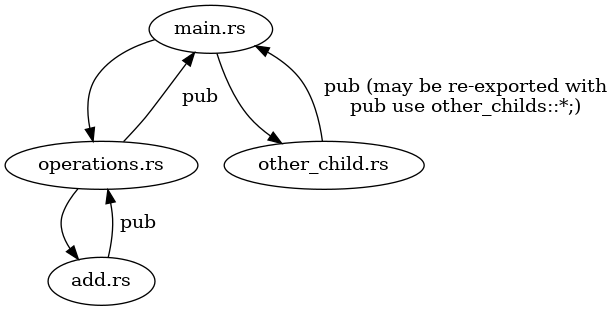

In [23]:
:dep petgraph = "*"
:dep petgraph-evcxr = "*"

extern crate petgraph;
use petgraph::graph::Graph;
use petgraph::dot::Dot;
use petgraph_evcxr::{draw_graph, draw_dot};

let mut g : Graph<&str, &str> = Graph::new();
let main = g.add_node("main.rs");
let operation = g.add_node("operations.rs");
let add = g.add_node("add.rs");
let other = g.add_node("other_child.rs");

g.add_edge(main, operation, "        ");
g.add_edge(operation, main, " pub");
g.add_edge(operation, add, "        ");
g.add_edge(add, operation, " pub");
g.add_edge(main, other, "        ");
g.add_edge(other, main, " pub (may be re-exported with\n pub use other_childs::*;)");

draw_graph(&g);

**tree src/**

```
src/
├── main.rs
├── operations
│   └── add.rs
├── operations.rs
└── other_child.rs

1 directory, 4 files
```